In [ ]:
import json
import matplotlib.pyplot as plt
import gdown


results_json = {
    'COCO_test_set_0.json': '1nWT00dBx8BRTzRC_eLXCSlpcx8gm5Tma',
    'COCO_test_set_0001.json': '1K8UHB62FRn44MdO4-_a5ZYQft7K1VQDf',
    'COCO_test_set_015.json': '1GFf1g1t54zVeB4KvdFA0it0T8RrLGQLO',
    'COCO_test_set_05.json': '1RgvT0-wozCyMIJvOf2ZboRGRHFy8jqh1',
    'COCO_test_set_1.json': '1AVoy3X4UXONPrnTtcXoKEivzToUgK1M2',
    'Flickr8k_test_set_015.json': '1JDp8jup258TImZCuUes22Uin5gd3s7Bi',
    'Nocaps_test_set_015.json': '1baLBYImLDFTHAU7PMzWyxR3772Q4DN7o',
    'VizWiz_test_set_015.json': '1-yPFIqckAtNXZXvcJ9lw24dwQ1A4yTyA',
}

def download_files():
    for file_name, file_id in results_json.items():
        gdown.download(f'https://drive.google.com/uc?id={file_id}', f'./{file_name}', quiet=False)

download_files()

Downloading...
From: https://drive.google.com/uc?id=1nWT00dBx8BRTzRC_eLXCSlpcx8gm5Tma
To: /content/COCO_test_set_0.json
100%|██████████| 1.34M/1.34M [00:00<00:00, 46.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K8UHB62FRn44MdO4-_a5ZYQft7K1VQDf
To: /content/COCO_test_set_0001.json
100%|██████████| 1.00M/1.00M [00:00<00:00, 31.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GFf1g1t54zVeB4KvdFA0it0T8RrLGQLO
To: /content/COCO_test_set_015.json
100%|██████████| 947k/947k [00:00<00:00, 28.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RgvT0-wozCyMIJvOf2ZboRGRHFy8jqh1
To: /content/COCO_test_set_05.json
100%|██████████| 956k/956k [00:00<00:00, 34.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AVoy3X4UXONPrnTtcXoKEivzToUgK1M2
To: /content/COCO_test_set_1.json
100%|██████████| 1.08M/1.08M [00:00<00:00, 23.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JDp8jup258TImZCuUes22Uin5gd3s7Bi
To: /content/Flickr8k_test_set_015.json
100%|██

In [ ]:
def load_json(filename):
  with open(f'./{filename}', 'r') as file:
      data = json.load(file)
  return data['noise_variance'], data['scores']


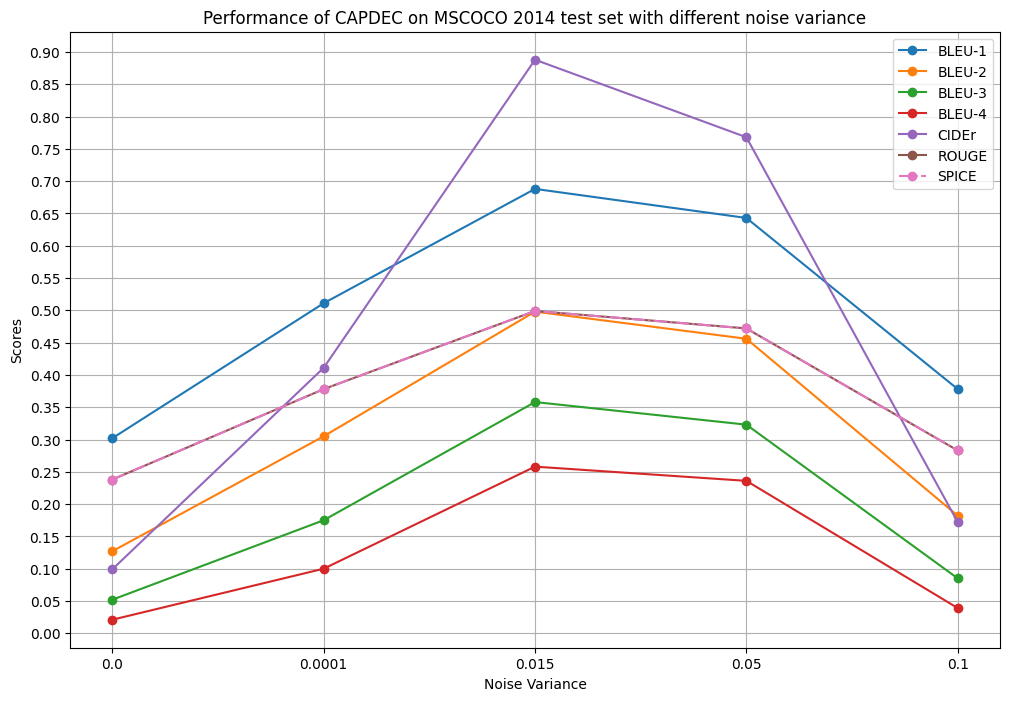

In [ ]:
_scoring = []
for filename in list(results_json.keys())[:5]:
    _scoring.append(load_json(filename))

noise_variances = ['0.0', '0.0001', '0.015', '0.05', '0.1',]
scores = {
    'BLEU-1': [],
    'BLEU-2': [],
    'BLEU-3': [],
    'BLEU-4': [],
    'CIDEr': [],
    'ROUGE': [],
    'SPICE': []
}

#_scoring = sorted(_scoring, key=lambda x: float(x[0]))

# Rearranging scores according to sorted noise_variances
sorted_scores = {k: [] for k in scores.keys()}

for noise, score_dict in _scoring:
    for score_type, value in score_dict.items():
        sorted_scores[score_type].append(value)

plt.figure(figsize=(12, 8))

# Plotting the graph with sorted scores
for score_type, values in sorted_scores.items():
    if score_type == 'SPICE':
        plt.plot(noise_variances, values, marker='o', label=score_type, linestyle='dashdot')
    else:
        plt.plot(noise_variances, values, marker='o', label=score_type)

plt.xlabel('Noise Variance')
plt.ylabel('Scores')
plt.title('Performance of CAPDEC on MSCOCO 2014 test set with different noise variance')
plt.yticks([i / 20 for i in range(19)])
plt.legend()
plt.grid(True)
plt.show()

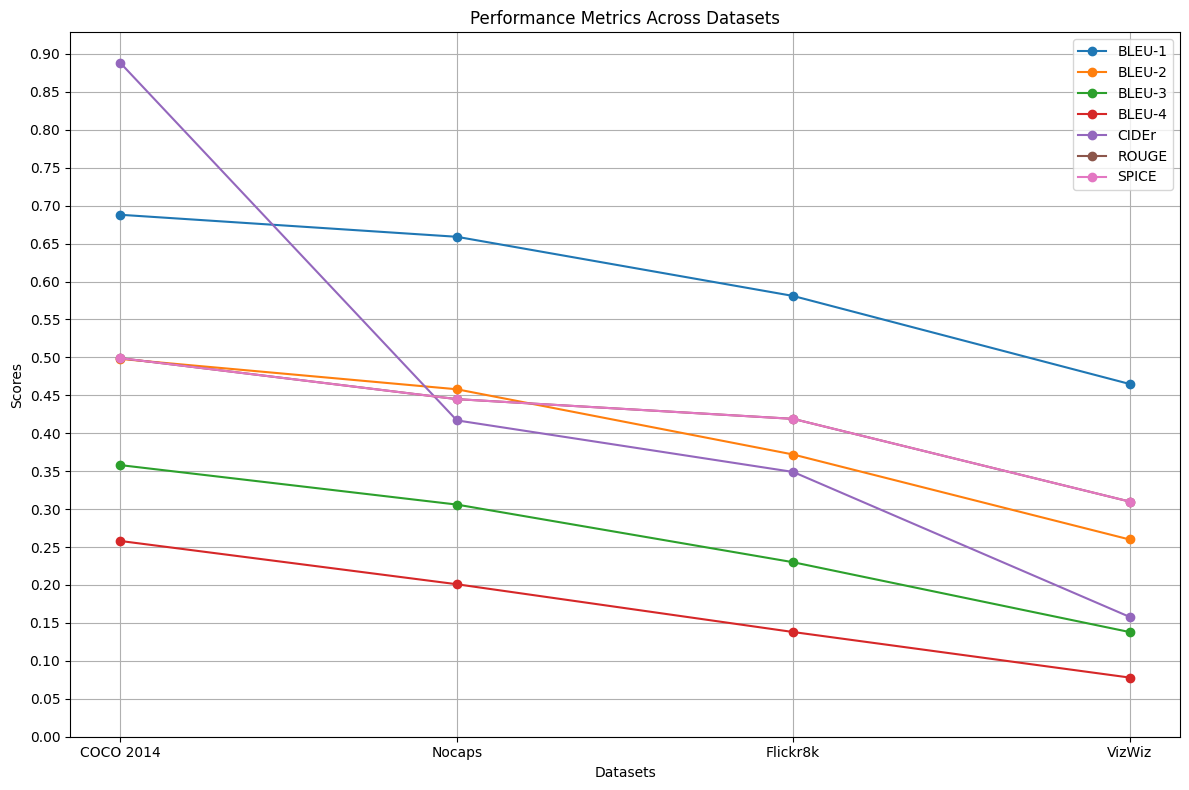

BLEU-1 - [0.688, 0.659, 0.581, 0.465]
BLEU-2 - [0.498, 0.458, 0.372, 0.26]
BLEU-3 - [0.358, 0.306, 0.23, 0.138]
BLEU-4 - [0.258, 0.201, 0.138, 0.078]
CIDEr - [0.888, 0.417, 0.349, 0.158]
ROUGE - [0.499, 0.445, 0.419, 0.31]
SPICE - [0.499, 0.445, 0.419, 0.31]


In [ ]:
_scoring = []
for filename in ['COCO_test_set_015.json', 'Nocaps_test_set_015.json', 'Flickr8k_test_set_015.json', 'VizWiz_test_set_015.json']:
  _, score_dict = load_json(filename)
  _scoring.append(score_dict)

dataset_order = ['COCO 2014', 'Nocaps', 'Flickr8k', 'VizWiz']
scores = {
    'BLEU-1': [0] * len(dataset_order),
    'BLEU-2': [0] * len(dataset_order),
    'BLEU-3': [0] * len(dataset_order),
    'BLEU-4': [0] * len(dataset_order),
    'CIDEr': [0] * len(dataset_order),
    'ROUGE': [0] * len(dataset_order),
    'SPICE': [0] * len(dataset_order)
}

# Arrange scores according to the dataset order
for idx, score_set in enumerate(_scoring):
    for metric, value in score_set.items():
        scores[metric][idx] = value

plt.figure(figsize=(12, 8))

for metric in scores:
    plt.plot(dataset_order, scores[metric], marker='o', label=metric)

plt.xlabel('Datasets')
plt.ylabel('Scores')
plt.title('Performance Metrics Across Datasets')
plt.legend()
plt.grid(True)
plt.yticks([i / 20 for i in range(19)])
plt.tight_layout()
plt.show()

for key, value in scores.items():
  print(f"{key} - {value}")
